In [32]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

### 1. Import Data

In [4]:
data = pd.read_csv(r"/Users/badremhiouah/Desktop/Python/JP_Morgan_Job_Sim/Nat_Gas.csv")

In [75]:
data.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


<Axes: >

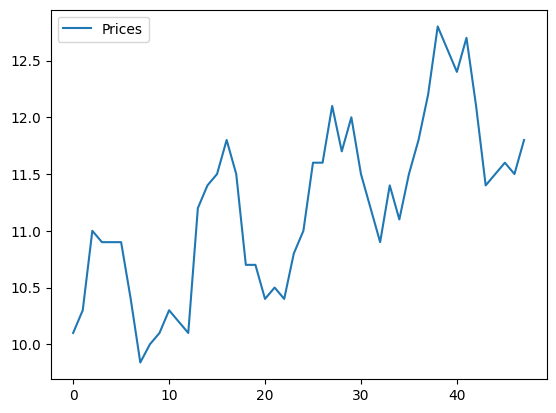

In [6]:
data.plot()

### 2. Create the model

In [76]:
data.rename(columns={'Dates': 'ds', 'Prices': 'y'}, inplace=True)

# Initialize the model
model = Prophet()

# Fit the model
model.fit(data)

13:57:48 - cmdstanpy - INFO - Chain [1] start processing
13:57:48 - cmdstanpy - INFO - Chain [1] done processing


### 3. Plot the model up to the date specified

You didn't enter the right format, so here is an exemple


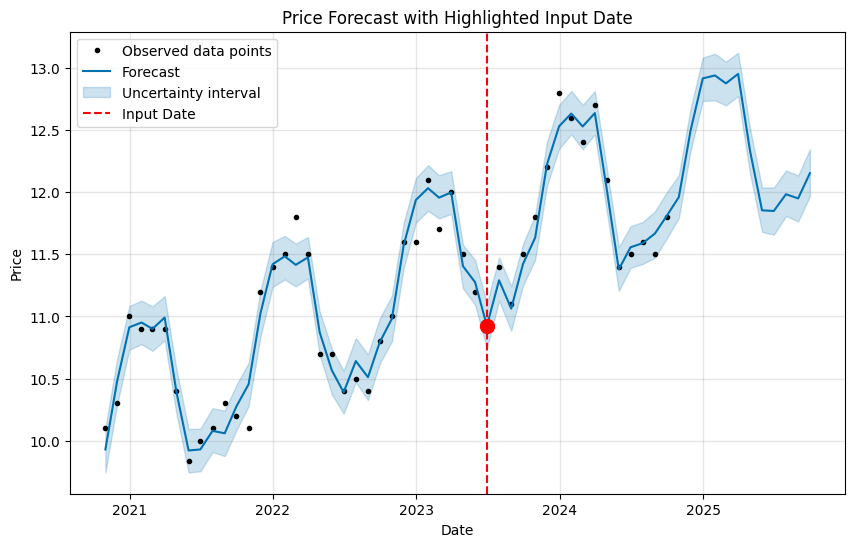

The predicted price for 2023-06-30 is 10.924214006429377


In [78]:
def predict_price(input_date, model):
    """
    Predicts the price for a given date using the Prophet model and plots the forecast with the specific date highlighted.

    Parameters:
    input_date (str): The date for which the price prediction is required in 'YYYY-MM-DD' format.
    model (Prophet): The trained Prophet model.

    Returns:
    float: The predicted price for the given date.
    """
    input_date2 = datetime.strptime(input_date, "%Y-%m-%d")
    input_date = min(datetime.strptime(input_date, "%Y-%m-%d"), datetime.strptime("2020-10-31", "%Y-%m-%d"))
    current_date = max(datetime.strptime("2025-09-30", "%Y-%m-%d"), input_date2)
   
    # Generate end-of-month dates for the specified range
    date_range = pd.date_range(start=input_date, end=current_date, freq='M')
    
    # Create a dataframe for the specified date range
    range_df = pd.DataFrame({'ds': date_range})

    # Predict prices for the specified date range
    forecast_range = model.predict(range_df)
    
    # Create a dataframe with the input date
    input_date_df = pd.DataFrame({'ds': [input_date2]})
    
    # Predict the price for the input date
    forecast_input_date = model.predict(input_date_df)
    
    # Extract the predicted price
    predicted_price = forecast_input_date['yhat'].values[0]
    
    # Plot the forecast including the specific date
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast_range, ax=ax)

    ax.axvline(input_date2, color='red', linestyle='--', label='Input Date')
    ax.scatter(input_date2, predicted_price, color='red', s=100, zorder=5)
    plt.title('Price Forecast with Highlighted Input Date')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return predicted_price


# Example usage:
try : 
    input_date = input("Enter the date you want to forecast in this format : YYYY-MM-DD" )  
    predicted_price = predict_price(input_date, model)
except:
    print("You didn't enter the right format, so here is an exemple")
    input_date = "2023-06-30"
    predicted_price = predict_price(input_date, model)
    
print(f'The predicted price for {input_date} is {predicted_price}')


In [1]:
def PricingContract(injection_dates, withdrawal_dates, P_sell,P_buy, rate_inj_withdraw, Volume,Storage_costs):
    value_contract  = (P_sell - P_buy)*Volume
    value_contract -= ((withdrawal_dates - injection_dates).days / 30.0)*Storage_costs
    value_contract -= rate_inj_withdraw*Volume
    return value_contract